## Importing necessary libraries

In [147]:
import pandas as pd
import numpy as np
import pandas_profiling
import re

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [148]:
df = pd.read_csv('client-trainingset-1561457457-252.csv')
df.head(2)

/Users/hy/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (50,172,255,256,257,258,376) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,cntryid,cntryid_e,age_r,gender_r,computerexperience,nativespeaker,edlevel3,monthlyincpr,yearlyincpr,lng_home,...,v85,v50,v89,v127,v239,v224,v71,v105,row,timestamp
0,Greece,Greece,50.0,Male,Yes,Yes,High,75 to less than 90,NaN,ell,...,Strongly agree,Strongly agree,NaN,NaN,2359.0,9996.0,8549,9996.0,58807,1561457457-252
1,Japan,Japan,47.0,Male,Yes,Yes,High,90 or more,90 or more,jpn,...,Neither agree nor disagree,Neither agree nor disagree,NaN,NaN,2522.0,9996.0,6202,9996.0,168058,1561457457-252


## Removing higly correlated, constant and unsupported features

In [149]:
# There are 27 columns which are highly correlated with at least one other variables.
# The list of correlated variables ('correlated_list_1')
# And description for each element of "correlated_list_1" are listed below.

correlated_list_1 = ['earnhrbonus', 'earnhrbonusppp', 'earnmthall', 'earnmthallppp', 'earnmthbonus',
                     'earnmthbonusppp', 'earnmthppp', 'isco2l', 'v1', 'v100', 'v110', 'v145', 'v156',
                    'v160', 'v163', 'v169', 'v231', 'v235', 'v283', 'v41', 'v45', 'v52', 'v63', 'v81',
                     'v87', 'v97', 'yrsqual_t']

# 01. earnhrbonus is highly correlated with earnhr (ρ = 0.9908)
# 02. earnhrbonusppp is highly correlated with earnhrppp (ρ = 0.99704)
# 03. earnmthall is highly correlated with earnmthbonus (ρ = 1)
# 04. earnmthallppp is highly correlated with earnmthselfppp (ρ = 1)
# 05. earnmthbonus is highly correlated with earnmth (ρ = 0.98944)
# 06. earnmthbonusppp is highly correlated with earnmthallppp (ρ = 1)
# 07. earnmthppp is highly correlated with earnhrbonusppp (ρ = 0.98068)
# 08. isco2l is highly correlated with isco1l (ρ = 0.95437) 
# 09. v1 is highly correlated with v235 (ρ = 0.96425)
# 10. v100 is highly correlated with v154 (ρ = 0.92684)
# 11. v110 is highly correlated with v78 (ρ = 0.90633)
# 12. v145 is highly correlated with nfehrs (ρ = 0.98147) 
# 13. v156 is highly correlated with v81 (ρ = 0.98304)
# 14. v160 is highly correlated with v145 (ρ = 1) 
# 15. v163 is highly correlated with v145 (ρ = 0.93648)
# 16. v169 is highly correlated with earnmthall (ρ = 0.98379) 
# 17. v231 is highly correlated with v202 (ρ = 1)
# 18. v235 is highly correlated with v135 (ρ = 0.96043) 
# 19. v283 is highly correlated with nfehrs (ρ = 0.9994) 
# 20. v41 is highly correlated with nfehrs (ρ = 1) 
# 21. v45 is highly correlated with v129 (ρ = 0.90453) 
# 22. v52 is highly correlated with v110 (ρ = 0.96293)
# 23. v63 is highly correlated with v100 (ρ = 1) 
# 24. v81 is highly correlated with v129 (ρ = 0.91191) 
# 25. v87 is highly correlated with v100 (ρ = 0.99779) 
# 26. v97 is highly correlated with v52 (ρ = 0.99996) 
# 27. yrsqual_t is highly correlated with yrsqual (ρ = 1)

In [150]:
# There 2 variables with constant values
# Since they have constant values they have no effect on predicting and therefore they should be dropped
# The list of variables with constant values ('constant_list_1')
# And description for each element of "constant_list_1" are listed below.

constant_list_1 = ['timestamp', 'v262']

# 1. timestamp has constant value 1561457457-252
# 2. v262 has constant value

In [151]:
# since 'ageg10lfs' is a transformation of 'age_r' and also age_r has %40 missing value, we will drop age_r
# since the informations are very close and edcat8 has missing values, we will drop "edcat7" and "edcat8"
# since "cnt_brth", "cnt_h", "cntryid" and "cntryid_e" have same information, 
# "cnt_brth", "cnt_h" and "cntryid_e" will be dropped with taking into consideration missing ratios.
# since "birthrgn", "ctryqual" and "ctrygn" have almost identical information
# "birthrgn" and "ctryqual" will be dropped with taking into consideration missing ratios.
# since "earnmthalldcl", "earnhrdcl" and "earnhrbonusdcl" have almost identical information
# "earnhrdcl" and "earnhrbonusdcl" will be dropped with taking into consideration missing ratios.
# since "nativespeaker" and "nativelang" have almost identical information,
# "nativelang" will be dropped with taking into consideration missing ratios.

# list of features to drop:
# age_r
# edcat7
# edcat8
# cnt_brth
# cnt_h
# cntryid
# cntryid_e
# birthrgn
# ctryqual
# earnhrdcl
# earnhrbonusdcl
# nativelang

correlated_list_2 = ['age_r', 'edcat7', 'edcat8', 'cnt_brth', 'cnt_h', 'cntryid', 'cntryid_e', 'birthrgn',
                     'ctryqual', 'earnhrdcl', 'earnhrbonusdcl', 'nativelang']

In [152]:
# There are also two columns with unsupported types:

unsupported_list_1 = ['v71', 'isic2l']

In [153]:
# creating a new dataframe in order to keep original one just in case
df2 = df.copy()

# concatenating four lists to drop
drop_list = correlated_list_1 + constant_list_1 + unsupported_list_1 + correlated_list_2

# dropping 43 variables from originial set
df2 = df2.drop(columns = drop_list, axis=1)

# checking summary info
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 337 entries, gender_r to row
dtypes: float64(52), int64(4), object(281)
memory usage: 51.4+ MB


## Cleaning, Filling and Transforming features

In [154]:
# creating 2 diffrent dataframes as numerical and categorical

categorical_clms = df2.select_dtypes(include=['O']).columns
print("Number of categorical columns: {}".format(len(categorical_clms)))

numerical_clms = df2.select_dtypes(include=['int64', 'float64']).columns
print("Number of numerical columns: {}".format(len(numerical_clms)))

df_cat = pd.DataFrame(df2, columns=categorical_clms)
df_num = pd.DataFrame(df2, columns=numerical_clms)

Number of categorical columns: 281
Number of numerical columns: 56


### Numerical features

In [155]:
#dropping target variable
df_num2 = df_num.drop('job_performance', axis=1)

# replacing outliers with median
for feature in df_num2.keys():
    step=1.5*((np.percentile(df_num2[feature], q=75))-(np.percentile(df_num2[feature], q=25)))
    lower_bound=(np.percentile(df_num2[feature], q=25))-step
    upper_bound=(np.percentile(df_num2[feature], q=75))+step
    median = round(df_num2[feature].median())
    df_num2[feature][df_num2[feature]<lower_bound] = median
    df_num2[feature][df_num2[feature]>upper_bound] = median

# filling NaN values with median (because some variables are highly skewed and also some are related with years)
df_num2 = df_num2.fillna(0)

for col in df_num2.columns:
    df_num2[col]=df_num2[col].replace(0,round(df_num2[col].median()))

# concatinating target variable again
df_num2 = pd.concat([df_num2, df2['job_performance']], axis=1, sort=False)

/Users/hy/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/Users/hy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/hy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


### Categorical features

In [156]:
# filling categorical missing with value of "unknown"
df_cat2 = df_cat.fillna('unknown')

# concatenating both dataframes again
df3 = pd.concat([df_num2, df_cat2], axis=1, sort=False)

# now we have a %100 filled dataframe
df3.head(2)

,yrsqual,yrsget,imyrs,leavedu,nfehrsnjr,nfehrsjr,nfehrs,isco1c,isco2c,isco1l,...,v191,v170,v65,v57,v177,v69,v85,v50,v89,v127
0,17.0,14.0,0.0,46.0,0.0,0.0,15.0,2,23,9996,...,To a very high extent,To a very high extent,To a very high extent,To a very high extent,Never,Disagree,Strongly agree,Strongly agree,unknown,unknown
1,16.0,16.0,0.0,22.0,0.0,24.0,24.0,2,25,9996,...,To some extent,To a high extent,Very little,To a high extent,Never,Agree,Neither agree nor disagree,Neither agree nor disagree,unknown,unknown


### Encoding categorical features

In [157]:
df4 = pd.get_dummies(df3, prefix_sep='_', drop_first=True)

## Modeling

### Splitting data

In [158]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
X = df4.drop(['job_performance'], axis=1)
y = df4['job_performance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


### Instantiating and fitting the base model

In [159]:
rf = RandomForestRegressor(random_state = 0)
rf.fit(X_train, y_train)
df_imp = pd.DataFrame(rf.feature_importances_, 
             index = X_train.columns, columns = ['importance']).sort_values('importance', ascending=False)

df_imp.head()

/Users/hy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,importance
v292_Every day,0.085538
yrsqual,0.072562
icthome,0.024659
gender_r_Male,0.022551
v31_unknown,0.018130


### Evaluation_1

In [160]:
y_pred = rf.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE:\n{}\n\nr2_score:\n{}'.format(mse, r2))

MSE:
39839.49162639608

r2_score:
0.7832947224660144


### Feature importance

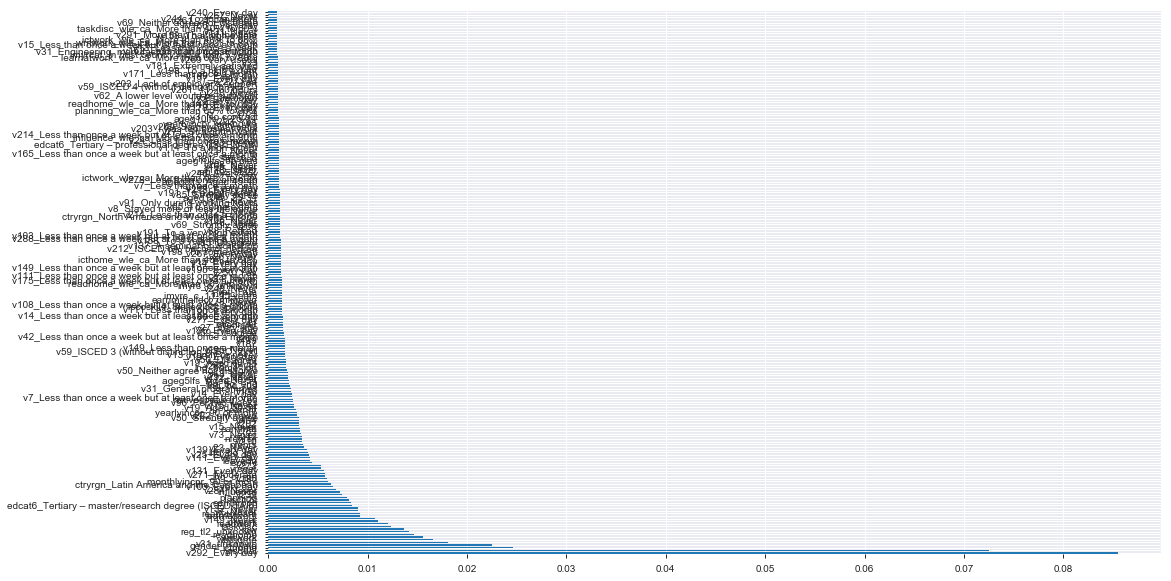

In [161]:
plt.figure(figsize=(16, 10))
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(205).plot(kind='barh')

### Figuring out important unique features

In [162]:
# total number of variables with dummies
len(df_imp)

1671

In [163]:
# Since we have dummy variables we need to figure out unique important features

# creating new dataframe which show cumilative importance of all variables including dummies
df_cumus = pd.DataFrame({'total_var':np.cumsum(df_imp['importance'].values)})

# the number of variables which are able to explain 99% of variance
df_cumus.loc[df_cumus['total_var']>0.98].head(1)

,total_var
733,0.980045


#### Function for getting root names of features

In [164]:
def underscore_split(list_):
    splitted_features = []
    
    for element in list_:
        triple = re.match(r'[\w+]+_[\w+]+_[\w+]+_[\w+]', element)
        double = re.match(r'[\w+]+_[\w+]+_[\w+]', element)
        single = re.match(r'[\w+]+_[\w+]', element)
        none = re.match(r'[\w+]', element)
    
        if triple:
            element = "_".join(element.split("_", 3)[:3])
        elif double:
            element = "_".join(element.split("_", 2)[:2])
        elif single:
            element = element.split("_")[0]
        else:
            element = element
    
        splitted_features.append(element)
    
    return splitted_features

#### Number of unique features for 95% explained variance

In [165]:
# we know the number of all features with dummies for 95% variance. 575
# computing number of unique features with "underscore_split" function

imp95_features = list(df_imp[:733].index.values)
imp95_features = list(set(underscore_split(imp95_features)))
len(imp95_features)


258

### Evaluation-2: with new feature set

In [166]:
# creating a new dataframe with detected important features
df5 = pd.concat([df3[imp95_features], df2['job_performance']], axis=1, sort=False)
df5.shape

(20000, 259)

In [167]:
# Encoding
df5 = pd.get_dummies(df5, prefix_sep='_', drop_first=True)

# Splitting
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
X = df5.drop(['job_performance'], axis=1)
y = df5['job_performance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Modeling
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
df_imp_2 = pd.DataFrame(rf.feature_importances_, 
             index = X_train.columns, columns = ['importance']).sort_values('importance', ascending=False)

# Evaluation
y_pred = rf.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE:\n{}\n\nr2_score:\n{}'.format(mse, r2))

/Users/hy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MSE:
41301.355255004266

r2_score:
0.7753429753321609


# Improvement is "+1669" (MSE)

### Figuring out the weakest features of new set

In [62]:
len(df_imp_2)

1294

In [118]:
# Since we have dummy variables we need to figure out unique important features

# creating new dataframe which show cumilative importance of all variables including dummies
df_cumus_2 = pd.DataFrame({'total_var':np.cumsum(df_imp_2['importance'].values)})

# the number of variables which are able to explain 99% of variance
df_cumus_2.loc[df_cumus_2['total_var']>0.96].head(1)

,total_var
581,0.960062


In [119]:
# we know the number of all features with dummies for 95% variance. 546
# computing number of unique features with "underscore_split" function

imp95_features_2 = list(df_imp_2[:581].index.values)
imp95_features_2 = list(set(underscore_split(imp95_features_2)))
len(imp95_features_2)

221

In [120]:
# creating a new dataframe with detected important features
df6 = pd.concat([df3[imp95_features_2], df2['job_performance']], axis=1, sort=False)
df6.shape

(20000, 222)

In [121]:
# Encoding
df6 = pd.get_dummies(df6, prefix_sep='_', drop_first=True)

# Splitting
X = df6.drop(['job_performance'], axis=1)
y = df6['job_performance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Modeling
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
df_imp_3 = pd.DataFrame(rf.feature_importances_, 
             index = X_train.columns, columns = ['importance']).sort_values('importance', ascending=False)

# Evaluation
y_pred = rf.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE:\n{}\n\nr2_score:\n{}'.format(mse, r2))

/Users/hy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MSE:
39716.17427661909

r2_score:
0.7839655021225116


In [75]:
# figuring out culilative importance of new feature set

# extracting features names from index
i_feature = list(df_imp_2.index.values)
# reducing to their root name
i_feature = underscore_split(i_feature)
# creating new dataframe of splitted features
df_i = pd.DataFrame(i_feature)
# concatinating above dataframe as a new feature to the df_imp_2
df_imp_2['features'] = pd.Series(i_feature, index=df_imp_2.index)
# grouping by features in order to get their total sum of contributions
set2_cums = df_imp_2.groupby(['features']).agg({'importance': 'sum'})
# sorting by sums
set2_cums_sorted = set2_cums.sort_values('importance', ascending=True)

print(set2_cums_sorted[:210])

                importance
features                  
v95               0.000115
v228              0.000118
v16               0.000143
v46               0.000214
fnfe12jr          0.000258
edlevel3          0.000298
v12               0.000312
earnmthselfppp    0.000370
nfe12jr           0.000393
v122              0.000425
v194              0.000439
faet12            0.000456
v32               0.000471
v247              0.000487
fnfaet12njr       0.000492
v72               0.000526
v229              0.000547
v134              0.000562
v206              0.000595
v285              0.000598
imyrs             0.000628
v99               0.000660
fnfaet12          0.000664
v227              0.000682
v22               0.000694
v138              0.000710
v251              0.000732
v225              0.000738
v90               0.000739
v142              0.000766
...                    ...
ageg5lfs          0.005139
v23               0.005219
v139              0.005495
v135              0.005688
i

In [76]:
#set2_cums_sorted = set2_cums.sort_values('importance', ascending=False)

print(set2_cums_sorted[::-1])

                importance
features                  
yrsqual           0.081057
v292              0.062727
icthome           0.032012
v31               0.031904
gender_r          0.019711
writwork          0.016900
v7                0.016351
writhome          0.015734
reg_tl2           0.015559
readhome          0.015430
v271              0.014462
v149              0.012167
readwork          0.012027
readytolearn      0.012008
v103              0.011197
ictwork           0.010992
taskdisc          0.010917
monthlyincpr      0.010320
row               0.009970
ctryrgn           0.009549
influence         0.009167
lng_ci            0.008621
isic1c            0.008489
v284              0.008204
v19               0.008134
v239              0.007999
planning          0.007991
learnatwork       0.007960
v14               0.007915
v50               0.007682
...                    ...
v142              0.000766
v90               0.000739
v225              0.000738
v251              0.000732
v

In [ ]:
grouping by the feature names according to their root name